# YelpChi

In [163]:
import pandas as pd
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from textblob import TextBlob
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
import string
from matplotlib import pyplot
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.metrics import classification_report
en_stop = set(nltk.corpus.stopwords.words('english'))
import gensim
from gensim import corpora
import random
import pyLDAvis.gensim
from gensim.models.callbacks import PerplexityMetric
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, TimeDistributed, Bidirectional
from keras.layers.embeddings import Embedding
from keras import optimizers
from keras.layers import Input
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
D:\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
D:\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
D:\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
D:\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is 

In [71]:
meta = pd.read_csv(r"E:\Yelp\YelpChi\output_meta_yelpResData_NRYRcleaned.txt", sep=" ", header=None)
data = pd.read_table(r"E:\Yelp\YelpChi\output_review_yelpResData_NRYRcleaned.txt", sep="\\n", header=None)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [72]:
print(meta.head())
print(data.head())
print(meta.shape, data.shape)

           0                       1                       2  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

                        3  4  5  6  7  8  
0  pbEiXam9YJL3neCYHGwLUA  N  0  0  0  5  
1  pbEiXam9YJL3neCYHGwLUA  N  0  0  0  5  
2  pbEiXam9YJL3neCYHGwLUA  N  0  0  2  3  
3  pbEiXam9YJL3neCYHGwLUA  N  3  0  8  3  
4  pbEiXam9YJL3neCYHGwLUA  N  0  2  1  5  
                                                   0
0  Unlike Next, which we'd eaten at the previous ...
1  Probably one of the best meals I've had ever. ...
2  Service was impeccable. Experience and present...
3  The problem with places like this, given the e...
4  I have no idea how to write my review - dining...
(61541, 9) (61541, 1)


In [73]:
data1 = pd.DataFrame()
data1[0] = data[0]
data1[1] = meta[4]
data1[2] = meta[8]
data = data1

In [74]:
print(data.head(),"\n", data.shape)

                                                   0  1  2
0  Unlike Next, which we'd eaten at the previous ...  N  5
1  Probably one of the best meals I've had ever. ...  N  5
2  Service was impeccable. Experience and present...  N  3
3  The problem with places like this, given the e...  N  3
4  I have no idea how to write my review - dining...  N  5 
 (61541, 3)


In [75]:
def binarize(charac):
    if charac=="N":
        return 0
    else:
        return 1

data[1] = data[1].apply(lambda c: binarize(c))

In [79]:
print("0: Real, 1: Fake\n\n", data[1].value_counts())

0: Real, 1: Fake

 0    53400
1     8141
Name: 1, dtype: int64


In [80]:
#Word Count
data['word_count'] = data[0].progress_apply(lambda st: len(str(st).split()))
data.head()

,0,1,2,word_count
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871
1,Probably one of the best meals I've had ever. ...,0,5,66
2,Service was impeccable. Experience and present...,0,3,45
3,"The problem with places like this, given the e...",0,3,358
4,I have no idea how to write my review - dining...,0,5,172


In [81]:
#Sentimental Deviation
pos_words = pd.read_table(r"C:\Users\elonm\Desktop\Yelp-Dataset-Analysis-master\poswords.txt", header=None)
neg_words = pd.read_table(r"C:\Users\elonm\Desktop\Yelp-Dataset-Analysis-master\negwords.txt", header=None)

def sentimental_deviation(txt):
    dev = 0
    flag = 0
    for word in txt.split():
        for pos in pos_words[0]:
            if pos == word.lower():
                if flag == -1:
                    dev = dev+1
                flag = 1
                #print(word, dev, flag)
        for neg in neg_words[0]:
            if neg == word.lower():
                if flag == 1:
                    dev = dev+1
                flag = -1
                #print(word, dev, flag)
    return dev

data['deviation'] = data[0].progress_apply(lambda txt: sentimental_deviation(str((txt))))
data.head()

,0,1,2,word_count,deviation
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871,17
1,Probably one of the best meals I've had ever. ...,0,5,66,0
2,Service was impeccable. Experience and present...,0,3,45,1
3,"The problem with places like this, given the e...",0,3,358,12
4,I have no idea how to write my review - dining...,0,5,172,4


In [82]:
data.to_csv(r"E:\Yelp\YelpChi\data.csv")

In [83]:
#Sentiment Polarity
data['polarity'] = data[0].progress_apply(lambda txt: TextBlob(str(txt)).sentiment.polarity)
data.head()

,0,1,2,word_count,deviation,polarity
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871,17,0.163124
1,Probably one of the best meals I've had ever. ...,0,5,66,0,0.471429
2,Service was impeccable. Experience and present...,0,3,45,1,0.413333
3,"The problem with places like this, given the e...",0,3,358,12,0.131882
4,I have no idea how to write my review - dining...,0,5,172,4,0.161696


In [84]:
#Positive Negative word count
def count_sentiment_pos(sentence):
    count = 0
    for word in sentence.split():
        for sent_word in pos_words[0]:
            if sent_word in word:
                count += 1
    return count

def count_sentiment_neg(sentence):
    count = 0
    for word in sentence.split():
        for sent_word in neg_words[0]:
            if sent_word in word:
                count += 1
    return count

data['pos_word_count'] = data[0].progress_apply(lambda txt: count_sentiment_pos(str(txt)))
data['neg_word_count'] = data[0].progress_apply(lambda txt: count_sentiment_neg(str(txt)))
data.head()

,0,1,2,word_count,deviation,polarity,pos_word_count,neg_word_count
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871,17,0.163124,56,64
1,Probably one of the best meals I've had ever. ...,0,5,66,0,0.471429,3,2
2,Service was impeccable. Experience and present...,0,3,45,1,0.413333,6,5
3,"The problem with places like this, given the e...",0,3,358,12,0.131882,26,39
4,I have no idea how to write my review - dining...,0,5,172,4,0.161696,11,18


In [86]:
data['count_sentiment'] = data['pos_word_count'] + data['neg_word_count']
data.head()

,0,1,2,word_count,deviation,polarity,pos_word_count,neg_word_count,count_sentiment
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871,17,0.163124,56,64,120
1,Probably one of the best meals I've had ever. ...,0,5,66,0,0.471429,3,2,5
2,Service was impeccable. Experience and present...,0,3,45,1,0.413333,6,5,11
3,"The problem with places like this, given the e...",0,3,358,12,0.131882,26,39,65
4,I have no idea how to write my review - dining...,0,5,172,4,0.161696,11,18,29


In [87]:
#Making a checkpoint
data.to_csv(r"E:\Yelp\YelpChi\data.csv")

In [89]:
data.head()

,0,1,2,word_count,deviation,polarity,pos_word_count,neg_word_count,count_sentiment
0,"Unlike Next, which we'd eaten at the previous ...",0,5,871,17,0.163124,56,64,120
1,Probably one of the best meals I've had ever. ...,0,5,66,0,0.471429,3,2,5
2,Service was impeccable. Experience and present...,0,3,45,1,0.413333,6,5,11
3,"The problem with places like this, given the e...",0,3,358,12,0.131882,26,39,65
4,I have no idea how to write my review - dining...,0,5,172,4,0.161696,11,18,29


In [92]:
def clean_text(text):
    trans = str.maketrans('', '', string.punctuation)
    words = text.split()
    stripped = [word.translate(trans) for word in words]
    a = [x for x in stripped if x!=""]
    b = [word.lower() for word in a]
    b = ' '.join(b)
    return b

data[0] = data[0].progress_apply(lambda text: clean_text(text))
data.head()

,0,1,2,word_count,deviation,polarity,pos_word_count,neg_word_count,count_sentiment
0,unlike next which wed eaten at the previous ni...,0,5,871,17,0.163124,56,64,120
1,probably one of the best meals ive had ever it...,0,5,66,0,0.471429,3,2,5
2,service was impeccable experience and presenta...,0,3,45,1,0.413333,6,5,11
3,the problem with places like this given the ex...,0,3,358,12,0.131882,26,39,65
4,i have no idea how to write my review dining a...,0,5,172,4,0.161696,11,18,29


In [95]:
#Stemming/Lemmatization
lemmatizer = WordNetLemmatizer()
#print(lemmatizer.lemmatize("going"))

def nltk2wn_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)

    res_words = []
    for word, tag in wn_tagged:
        if tag is None:            
            res_words.append(word)
        else:
            res_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(res_words)

# test =  "You better lose yourself in the music, the moment You own it, you better never let it go You only get one shot, do not miss your chance to blow This opportunity comes once in a lifetime"
# print(lemmatize_sentence(test))

data[0] = data[0].progress_apply(lambda text: lemmatize_sentence(text))

In [96]:
data.to_csv(r"E:\Yelp\YelpChi\data.csv")
data.head()

,0,1,2,word_count,deviation,polarity,pos_word_count,neg_word_count,count_sentiment
0,unlike next which wed eaten at the previous ni...,0,5,871,17,0.163124,56,64,120
1,probably one of the best meal ive have ever it...,0,5,66,0,0.471429,3,2,5
2,service be impeccable experience and presentat...,0,3,45,1,0.413333,6,5,11
3,the problem with place like this give the exho...,0,3,358,12,0.131882,26,39,65
4,i have no idea how to write my review din at a...,0,5,172,4,0.161696,11,18,29


In [100]:
#Creating a train test split for the final processing
X_train, X_test, y_train, y_test = train_test_split(data[[0, 2, 'word_count', 'deviation', 'polarity', 'count_sentiment', 'pos_word_count', 'neg_word_count']], data[1], test_size=0.25, random_state=42)
X_train.to_csv(r"E:\Yelp\YelpChi\X_train")
X_test.to_csv(r"E:\Yelp\YelpChi\X_test")
y_train.to_csv(r"E:\Yelp\YelpChi\y_train")
y_test.to_csv(r"E:\Yelp\YelpChi\y_test")
print(X_train.shape, X_test.shape)
print(y_test.value_counts(), y_train.value_counts())

(46155, 8) (15386, 8)
0    13340
1     2046
Name: 1, dtype: int64 0    40060
1     6095
Name: 1, dtype: int64


# Model based on features

In [101]:
X_train = X_train[[2, 'word_count', 'deviation', 'polarity', 'count_sentiment', 'pos_word_count', 'neg_word_count']]
X_test = X_test[[2, 'word_count', 'deviation', 'polarity', 'count_sentiment', 'pos_word_count', 'neg_word_count']]

In [102]:
#SVM
svm_clf = svm.SVC(kernel='sigmoid', gamma='auto', verbose=True)
svm_clf.fit(X_train, y_train)  

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [103]:
y_pred = svm_clf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\elonm\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93     13340
           1       0.00      0.00      0.00      2046

   micro avg       0.87      0.87      0.87     15386
   macro avg       0.43      0.50      0.46     15386
weighted avg       0.75      0.87      0.81     15386



In [104]:
#XGB
xgb_model = XGBClassifier(learning_rate = 0.2, objective= 'binary:logistic')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
y_pred = xgb_model.predict(X_test)
y_pred = [round(value) for value in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     13340
           1       0.27      0.00      0.00      2046

   micro avg       0.87      0.87      0.87     15386
   macro avg       0.57      0.50      0.47     15386
weighted avg       0.79      0.87      0.81     15386



[0.12816691 0.25186288 0.07153502 0.2637854  0.07898659 0.07898659
 0.1266766 ]


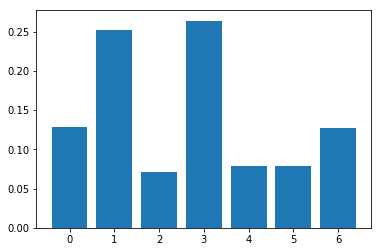

In [108]:
print(xgb_model.feature_importances_)
# plot
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

In [110]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv(r"E:\Yelp\YelpChi\res_features.csv", header=None)

# Model based on LDA

In [121]:
X_train = pd.read_csv(r"E:\Yelp\YelpChi\X_train")
X_test = pd.read_csv(r"E:\Yelp\YelpChi\X_test")
y_train = pd.read_csv(r"E:\Yelp\YelpChi\y_train", header=None)
y_test = pd.read_csv(r"E:\Yelp\YelpChi\y_test", header=None)
print(X_train.shape, y_test.shape, y_train.shape)

(46155, 9) (15386, 2) (46155, 2)


In [123]:
X_train = X_train['0']
X_test = X_test['0']
y_train = y_train[1]
y_test = y_test[1]

In [129]:
data = pd.read_csv(r"E:\Yelp\YelpChi\data.csv")
data.columns

Index(['Unnamed: 0', '0', '1', '2', 'word_count', 'deviation', 'polarity',
       'pos_word_count', 'neg_word_count', 'count_sentiment'],
      dtype='object')

In [130]:
def preprocess_text(text):
    #Getting tokens from text
    tokens = []
    text_split = text.split()
    for token in text_split:
        tokens.append(token)
    #Removing stop words from the list of tokens
    tokens = [token for token in tokens if token not in en_stop]
    return tokens

real = data[data['1'] == 0]
fake = data[data['1'] == 1]
print("Real:",real.shape,"Fake:",fake.shape)

Real: (53400, 10) Fake: (8141, 10)


In [132]:
#Converting all our text to a list of preprocessed tokens
review_data = []
pbar = tqdm_notebook(total=data.shape[0])
for text in data['1']:
    tokens = preprocess_text(str(text))
    review_data.append(tokens)
    pbar.update(1)
pbar.close()

In [133]:
#Separating real and fake reviews in different lists
real = []
fake = []

for i in range(len(review_data)):
    if data['1'][i] == 0:
        real.append(review_data[i])
    else:
        fake.append(review_data[i])

print(len(real), len(fake))

53400 8141


In [135]:
rangex = X_train.shape[0]
print(rangex)

46155


In [137]:
real_indexes = []
fake_indexes = []
real_train = []
fake_train = []

for i in range(rangex):
    if y_train[i] == 0:
        real_train.append(X_train[i])
    else:
        fake_train.append(X_train[i])

In [138]:
real_t = []
fake_t = []
pbar = tqdm_notebook(total=data.shape[0])
for text in real_train:
    tokens = preprocess_text(str(text))
    real_t.append(tokens)
    pbar.update(1)
pbar.close()
real_train = real_t

pbar = tqdm_notebook(total=data.shape[0])
for text in fake_train:
    tokens = preprocess_text(str(text))
    fake_t.append(tokens)
    pbar.update(1)
pbar.close()
fake_train = fake_t

In [139]:
print("Sample of token:",real_train[2], "||",fake_train[21])

Sample of token: ['thing', 'keep', 'mind', 'place', 'busy', 'neighborhood', 'locate', 'grow', 'size', 'popularity', 'youre', 'wait', 'show', 'ive', 'pleasure', 'eat', 'lunch', 'breakfast', 'impression', 'breakfast', 'place', 'first', 'lunch', 'place', 'second', 'evidence', 'name', 'establishment', 'say', 'lunch', 'sandwich', 'hearty', 'portion', 'tasty', 'youll', 'readily', 'notice', 'traffic', 'less', 'morning', 'shift', 'worth', 'decent', 'change', 'pace', 'mood', 'entire', 'place', 'comparison', 'morning', 'seem', 'bit', 'deflated', 'lax', 'say', 'bad', 'thing', 'im', 'firm', 'belief', 'change', 'meal', 'dictate', 'equal', 'change', 'mood', 'pace', 'place', 'seem', 'mirror', 'morning', 'chaos', 'youre', 'look', 'quiet', 'meal', 'sit', 'alone', 'corner', 'pour', 'crossword', 'puzzle', 'yolk', 'would', 'first', 'choice', 'place', 'busy', 'youre', 'go', 'get', 'people', 'mob', 'waiting', 'room', 'everyone', 'either', 'busy', 'try', 'get', 'wait', 'list', 'try', 'deduce', 'turn', 'sort'

In [140]:
review_data = []
for i in real_train:
    review_data.append(i)
for i in fake_train:
    review_data.append(i)
#Creating dictionary of our data using Gensim and saving 
dictionary = corpora.Dictionary(review_data)
dictionary.save('dictionary.gensim')

#For saving corpus, use:
#pickle.dump(corpus, open('corpus.pkl', 'wb'))

In [141]:
NUM_TOPICS = 5

#Getting 5 topics from real_train
real_corpus = [dictionary.doc2bow(text) for text in real_train]
perplexity1 = PerplexityMetric(corpus=real_corpus)
real_model = gensim.models.ldamodel.LdaModel(real_corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20, eval_every=1000)
real_topics = real_model.print_topics(num_words=7)
for topic in real_topics:
    print(topic)

#Getting 5 topics from fake_train
fake_corpus = [dictionary.doc2bow(text) for text in fake_train]
perplexity2 = PerplexityMetric(corpus=fake_corpus)
fake_model = gensim.models.ldamodel.LdaModel(fake_corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=20, eval_every=1000)
fake_topics = fake_model.print_topics(num_words=7)
for topic in fake_topics:
    print(topic)

(0, '0.019*"fry" + 0.018*"hot" + 0.015*"dog" + 0.014*"burger" + 0.014*"beer" + 0.013*"duck" + 0.013*"get"')
(1, '0.034*"pizza" + 0.015*"good" + 0.012*"get" + 0.010*"place" + 0.009*"dish" + 0.009*"order" + 0.009*"chicken"')
(2, '0.012*"get" + 0.012*"go" + 0.010*"food" + 0.009*"place" + 0.009*"us" + 0.009*"table" + 0.008*"like"')
(3, '0.009*"dish" + 0.009*"good" + 0.008*"order" + 0.008*"pork" + 0.008*"like" + 0.007*"salad" + 0.007*"cheese"')
(4, '0.024*"place" + 0.023*"great" + 0.021*"food" + 0.021*"good" + 0.016*"go" + 0.011*"love" + 0.011*"get"')
(0, '0.003*"ear" + 0.003*"play" + 0.003*"concert" + 0.002*"screen" + 0.002*"level" + 0.002*"lockdown" + 0.002*"pain"')
(1, '0.002*"trade" + 0.002*"whoopercheesie" + 0.002*"approve" + 0.001*"cory" + 0.001*"reservationgo" + 0.001*"unbelieve" + 0.001*"uphttpforksandcorkschicagocom20110114schwachicagostinypieceofculinaryheaven"')
(2, '0.022*"great" + 0.017*"food" + 0.013*"good" + 0.012*"love" + 0.010*"place" + 0.009*"always" + 0.007*"restaurant"')

In [142]:
lda_display = pyLDAvis.gensim.prepare(real_model, real_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

D:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [143]:
lda_display = pyLDAvis.gensim.prepare(fake_model, fake_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

D:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [147]:
test_set = []
pbar = tqdm_notebook(total=X_test.shape[0])
for text in X_test:
    tokens = preprocess_text(str(text))
    test_set.append(tokens)
    pbar.update(1)
pbar.close()
X_test = test_set

In [151]:
dictionary.doc2bow(X_test[0])

[(24, 1),
 (66, 1),
 (70, 1),
 (106, 1),
 (130, 1),
 (158, 1),
 (176, 1),
 (225, 1),
 (240, 1),
 (289, 1),
 (545, 1),
 (810, 1),
 (1862, 1),
 (4436, 1),
 (4827, 1),
 (5030, 1),
 (5908, 1),
 (7882, 1),
 (8753, 1)]

In [157]:
#Making predictions based on topics
y_pred = []

for test_text in X_test:
    test_doc_bow = dictionary.doc2bow(test_text)
    real_scores = []
    fake_scores = []
    for i in real_model.get_document_topics(test_doc_bow):
        #real_model.get_document_topics(new_doc_bow)[0][1] -> Fit value of doc on topic 0
        real_scores.append(i[1])
    for i in fake_model.get_document_topics(test_doc_bow):
        fake_scores.append(i[1])
        
    #Best Fit on real model
    real_fit = max(real_scores)
    #Best Fit on fake model
    fake_fit = max(fake_scores)
    
    if real_fit >= fake_fit:
        y_pred.append(0)
    else:
        y_pred.append(1)    

In [161]:
#Evaluating
real_correct = 0
fake_correct = 0

for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        if y_test[i] == 0:
            real_correct = real_correct + 1
        else:
            fake_correct = fake_correct + 1
        
acc = ((real_correct+fake_correct)/len(y_test))*100
print("Overall Accuracy:", acc,"%")
print("Real correct:", real_correct)
print("Fake correct:", fake_correct)

Overall Accuracy: 29.234368906798387 %
Real correct: 3020
Fake correct: 1478


In [167]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv(r"E:\Yelp\YelpChi\res_lda.csv", header=None)

# Neural Network Model

In [162]:
X_train = pd.read_csv(r"E:\Yelp\YelpChi\X_train")
X_test = pd.read_csv(r"E:\Yelp\YelpChi\X_test")
y_train = pd.read_csv(r"E:\Yelp\YelpChi\y_train", header=None)
y_test = pd.read_csv(r"E:\Yelp\YelpChi\y_test", header=None)
print(X_train.shape, y_test.shape, y_train.shape)

(46155, 9) (15386, 2) (46155, 2)


In [168]:
tokenizer = Tokenizer(num_words= 2000)
tokenizer.fit_on_texts(X_train['0'])
sequences = tokenizer.texts_to_sequences(X_train['0'])
data1 = pad_sequences(sequences, maxlen=100)

In [304]:
model = Sequential()
model.add(Embedding(2000, 32, input_length=100))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 32)           64000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               819456    
_________________________________________________________________
dense_45 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 924,673
Trainable params: 924,673
Non-trainable params: 0
_________________________________________________________________


In [305]:
model.fit(data1, y_train[1], batch_size=1000, epochs=3, verbose = 1)

Epoch 1/3
46155/46155 [==============================] - ETA: 28s - loss: 0.6909 - acc: 0.60 - ETA: 15s - loss: 0.6351 - acc: 0.73 - ETA: 10s - loss: 0.5898 - acc: 0.78 - ETA: 8s - loss: 0.5481 - acc: 0.8045 - ETA: 7s - loss: 0.5302 - acc: 0.816 - ETA: 6s - loss: 0.5129 - acc: 0.824 - ETA: 5s - loss: 0.4865 - acc: 0.834 - ETA: 5s - loss: 0.4716 - acc: 0.839 - ETA: 4s - loss: 0.4595 - acc: 0.844 - ETA: 4s - loss: 0.4515 - acc: 0.846 - ETA: 3s - loss: 0.4403 - acc: 0.850 - ETA: 3s - loss: 0.4355 - acc: 0.852 - ETA: 3s - loss: 0.4297 - acc: 0.854 - ETA: 3s - loss: 0.4254 - acc: 0.855 - ETA: 3s - loss: 0.4217 - acc: 0.856 - ETA: 2s - loss: 0.4188 - acc: 0.857 - ETA: 2s - loss: 0.4163 - acc: 0.858 - ETA: 2s - loss: 0.4153 - acc: 0.858 - ETA: 2s - loss: 0.4150 - acc: 0.857 - ETA: 2s - loss: 0.4129 - acc: 0.858 - ETA: 2s - loss: 0.4132 - acc: 0.857 - ETA: 2s - loss: 0.4120 - acc: 0.858 - ETA: 1s - loss: 0.4103 - acc: 0.858 - ETA: 1s - loss: 0.4089 - acc: 0.858 - ETA: 1s - loss: 0.4071 - acc: 

In [306]:
test_sequences = tokenizer.texts_to_sequences(X_test['0'])
test_sequences_matrix = pad_sequences(test_sequences,maxlen=100)

In [307]:
y_pred = model.predict(test_sequences_matrix)

In [308]:
tst = []
for i in y_pred:
    if i >= 0.50:
        tst.append(1)
    else:
        tst.append(0)

from sklearn.metrics import classification_report
print(classification_report(y_test[1], tst))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     13340
           1       0.31      0.03      0.05      2046

   micro avg       0.86      0.86      0.86     15386
   macro avg       0.59      0.51      0.49     15386
weighted avg       0.79      0.86      0.81     15386



In [309]:
results = model.evaluate(test_sequences_matrix, y_test[1])

15386/15386 [==============================] - ETA: 1: - ETA: 2s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 55us/step


In [310]:
print("Accuracy:", results[1]*100, "%")

Accuracy: 86.2667359906614 %


In [311]:
a = 0
for i in range(len(tst)):
    if tst[i] == y_test[1][i]:
        a = a + 1

In [312]:
(a/15386)*100

86.26673599376056

In [313]:
y_pred = pd.DataFrame(tst)
y_pred.to_csv(r"E:\Yelp\YelpChi\res_nn.csv", header=None)

# Ensembling


In [500]:
res1 = pd.read_csv(r"E:\Yelp\YelpChi\res_lda.csv", header=None)
res2 = pd.read_csv(r"E:\Yelp\YelpChi\res_nn.csv", header=None)
res3 = pd.read_csv(r"E:\Yelp\YelpChi\res_features.csv", header=None)

In [501]:
print(res1.shape, res2.shape, res3.shape)

(15386, 2) (15386, 2) (15386, 2)


In [502]:
y_test = pd.read_csv(r"E:\Yelp\YelpChi\y_test", header=None)

In [503]:
y_test.shape
X = pd.DataFrame({'a':res1[1], 'b':res2[1], 'c':res3[1]})

In [504]:
X.shape

(15386, 3)

In [505]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y_test[1], test_size=0.33, random_state=42)

In [507]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
10308/10308 [==============================] - ETA: 3:51 - loss: 0.7198 - acc: 0.187 - ETA: 5s - loss: 0.7036 - acc: 0.3430  - ETA: 2s - loss: 0.6818 - acc: 0.611 - ETA: 1s - loss: 0.6589 - acc: 0.705 - ETA: 0s - loss: 0.6425 - acc: 0.741 - ETA: 0s - loss: 0.6254 - acc: 0.766 - ETA: 0s - loss: 0.6095 - acc: 0.782 - ETA: 0s - loss: 0.5936 - acc: 0.796 - 1s 109us/step - loss: 0.5830 - acc: 0.8036
Epoch 2/5
10308/10308 [==============================] - ETA: 0s - loss: 0.4505 - acc: 0.906 - ETA: 0s - loss: 0.4765 - acc: 0.860 - ETA: 0s - loss: 0.4617 - acc: 0.869 - ETA: 0s - loss: 0.4529 - acc: 0.870 - ETA: 0s - loss: 0.4447 - acc: 0.871 - ETA: 0s - loss: 0.4451 - acc: 0.866 - ETA: 0s - loss: 0.4399 - acc: 0.866 - 0s 34us/step - loss: 0.4356 - acc: 0.8673
Epoch 3/5
10308/10308 [==============================] - ETA: 0s - loss: 0.5665 - acc: 0.750 - ETA: 0s - loss: 0.3931 - acc: 0.876 - ETA: 0s - loss: 0.3875 - acc: 0.878 - ETA: 0s - loss: 0.3936 - acc: 0.873 - ETA: 0s - loss: 0.

In [508]:
scores = model.evaluate(X_test, y_test)

5078/5078 [==============================] - ETA: 40 - ETA: 0 - 0s 68us/step


In [509]:
print("Accuracy:",scores[1]*100,"%")

Accuracy: 86.64828671766765 %


In [520]:
y_pred = model.predict(X_test)

tst = []
for i in y_pred:
    if i >= 0.15:
        tst.append(1)
    else:
        tst.append(0)

from sklearn.metrics import classification_report
print(classification_report(y_test, tst))

a = 0
for i in range(len(tst)):
    if tst[i] == y_test.tolist()[i]:
        a = a + 1

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      4400
           1       0.16      0.31      0.21       678

   micro avg       0.70      0.70      0.70      5078
   macro avg       0.52      0.53      0.51      5078
weighted avg       0.78      0.70      0.73      5078

